In [21]:
import pandas as pd
import librosa
import pickle
import numpy as np
import torch

In [22]:
#import file description
data = pd.read_pickle('../data/description3.pkl')
data = data[['name','wav_path']]
data = data.sort_values(by='name')
data

,name,wav_path
2672,Ses01F_impro01_F000,../data/IEMOCAP_full_release/Session1/sentence...
869,Ses01F_impro01_F001,../data/IEMOCAP_full_release/Session1/sentence...
6397,Ses01F_impro01_F002,../data/IEMOCAP_full_release/Session1/sentence...
2638,Ses01F_impro01_F005,../data/IEMOCAP_full_release/Session1/sentence...
5798,Ses01F_impro01_F006,../data/IEMOCAP_full_release/Session1/sentence...
...,...,...
2477,Ses05M_script03_2_M041,../data/IEMOCAP_full_release/Session5/sentence...
5732,Ses05M_script03_2_M042,../data/IEMOCAP_full_release/Session5/sentence...
5731,Ses05M_script03_2_M043,../data/IEMOCAP_full_release/Session5/sentence...
6806,Ses05M_script03_2_M044,../data/IEMOCAP_full_release/Session5/sentence...


In [39]:
##try one data
file_path = data['wav_path'][10]
##default 44100
y, sr = librosa.load(file_path, sr=44100)
y, sr
mfcc = librosa.feature.mfcc(y,)

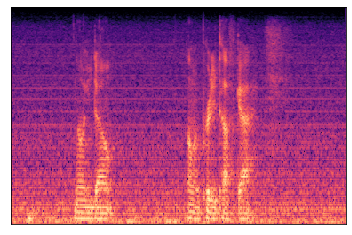

In [61]:
import matplotlib.pyplot as plt
import librosa.display

fig, ax = plt.subplots()

file_path = data['wav_path'][7486]
y, sr = librosa.load(file_path, sr=44100)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256,
                                    fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

img = librosa.display.specshow(S_dB, ax=ax)

In [10]:
##run all
data['wav_vec'] = data['wav_path'].apply(lambda x: librosa.load(x,sr=16800)[0])   # 3840

In [11]:
data['mfcc'] = data['wav_vec'].apply(lambda x: librosa.feature.mfcc(x))

In [152]:
#data['mfcc_move'] = data['mfcc'] + 536.6375122070312

In [12]:
data.to_pickle('../data/audio_vec3.pkl')

In [ ]:
#####

In [62]:
data = pd.read_pickle('../data/audio_vec3.pkl')

data

,name,wav_path,wav_vec,mfcc,mfcc_tensor,len
2672,Ses01F_impro01_F000,../data/IEMOCAP_full_release/Session1/sentence...,"[-0.0049183914, -0.005193128, -0.0037302205, -...","[[-403.2992, -403.99564, -418.60098, -430.6033...","[[tensor(-403.2992), tensor(111.5577), tensor(...",64
869,Ses01F_impro01_F001,../data/IEMOCAP_full_release/Session1/sentence...,"[0.0008912799, -0.00080922246, -0.0008829906, ...","[[-440.9477, -440.35678, -444.22382, -454.4793...","[[tensor(-440.9477), tensor(86.9970), tensor(3...",46
6397,Ses01F_impro01_F002,../data/IEMOCAP_full_release/Session1/sentence...,"[-0.00035539138, -0.00018541797, 0.00036854547...","[[-488.7508, -483.17978, -487.37247, -491.6459...","[[tensor(-488.7508), tensor(134.2754), tensor(...",103
2638,Ses01F_impro01_F005,../data/IEMOCAP_full_release/Session1/sentence...,"[-0.0008307451, -0.001257612, -0.00163322, -0....","[[-442.62433, -442.75513, -447.25168, -449.531...","[[tensor(-442.6243), tensor(100.5072), tensor(...",133
5798,Ses01F_impro01_F006,../data/IEMOCAP_full_release/Session1/sentence...,"[0.0059672054, 0.007951581, 0.008477929, 0.009...","[[-388.91025, -391.68872, -407.02652, -420.609...","[[tensor(-388.9102), tensor(110.6669), tensor(...",152
...,...,...,...,...,...,...
2477,Ses05M_script03_2_M041,../data/IEMOCAP_full_release/Session5/sentence...,"[-0.0029622193, -0.0026563518, -0.0023848368, ...","[[-454.80136, -452.6492, -455.89185, -456.3338...","[[tensor(-454.8014), tensor(73.3494), tensor(3...",272
5732,Ses05M_script03_2_M042,../data/IEMOCAP_full_release/Session5/sentence...,"[0.0038855707, -0.0038261486, -0.019008784, -0...","[[-274.242, -265.47397, -266.55762, -278.7483,...","[[tensor(-274.2420), tensor(46.8648), tensor(-...",58
5731,Ses05M_script03_2_M043,../data/IEMOCAP_full_release/Session5/sentence...,"[0.00737412, 0.0081156045, 0.007887541, 0.0111...","[[-281.0096, -180.58855, -64.66723, -16.851734...","[[tensor(-281.0096), tensor(105.4553), tensor(...",74
6806,Ses05M_script03_2_M044,../data/IEMOCAP_full_release/Session5/sentence...,"[0.15159218, 0.1694383, 0.11883879, 0.05175138...","[[-54.12678, -51.766266, -53.77585, -69.686646...","[[tensor(-54.1268), tensor(64.4214), tensor(-1...",147


In [14]:
data['mfcc_tensor'] = data['mfcc'].map(lambda x: torch.tensor(x).permute(1,0))
data['len'] = data['mfcc'].map(lambda x: x.shape[1])

In [64]:
data['len']

20

In [16]:
data['mfcc_tensor']

2672    [[tensor(-403.2992), tensor(111.5577), tensor(...
869     [[tensor(-440.9477), tensor(86.9970), tensor(3...
6397    [[tensor(-488.7508), tensor(134.2754), tensor(...
2638    [[tensor(-442.6243), tensor(100.5072), tensor(...
5798    [[tensor(-388.9102), tensor(110.6669), tensor(...
                              ...                        
2477    [[tensor(-454.8014), tensor(73.3494), tensor(3...
5732    [[tensor(-274.2420), tensor(46.8648), tensor(-...
5731    [[tensor(-281.0096), tensor(105.4553), tensor(...
6806    [[tensor(-54.1268), tensor(64.4214), tensor(-1...
3760    [[tensor(-315.0024), tensor(45.3514), tensor(4...
Name: mfcc_tensor, Length: 7487, dtype: object

In [17]:
data

,name,wav_path,wav_vec,mfcc,mfcc_tensor,len
2672,Ses01F_impro01_F000,../data/IEMOCAP_full_release/Session1/sentence...,"[-0.0049183914, -0.005193128, -0.0037302205, -...","[[-403.2992, -403.99564, -418.60098, -430.6033...","[[tensor(-403.2992), tensor(111.5577), tensor(...",64
869,Ses01F_impro01_F001,../data/IEMOCAP_full_release/Session1/sentence...,"[0.0008912799, -0.00080922246, -0.0008829906, ...","[[-440.9477, -440.35678, -444.22382, -454.4793...","[[tensor(-440.9477), tensor(86.9970), tensor(3...",46
6397,Ses01F_impro01_F002,../data/IEMOCAP_full_release/Session1/sentence...,"[-0.00035539138, -0.00018541797, 0.00036854547...","[[-488.7508, -483.17978, -487.37247, -491.6459...","[[tensor(-488.7508), tensor(134.2754), tensor(...",103
2638,Ses01F_impro01_F005,../data/IEMOCAP_full_release/Session1/sentence...,"[-0.0008307451, -0.001257612, -0.00163322, -0....","[[-442.62433, -442.75513, -447.25168, -449.531...","[[tensor(-442.6243), tensor(100.5072), tensor(...",133
5798,Ses01F_impro01_F006,../data/IEMOCAP_full_release/Session1/sentence...,"[0.0059672054, 0.007951581, 0.008477929, 0.009...","[[-388.91025, -391.68872, -407.02652, -420.609...","[[tensor(-388.9102), tensor(110.6669), tensor(...",152
...,...,...,...,...,...,...
2477,Ses05M_script03_2_M041,../data/IEMOCAP_full_release/Session5/sentence...,"[-0.0029622193, -0.0026563518, -0.0023848368, ...","[[-454.80136, -452.6492, -455.89185, -456.3338...","[[tensor(-454.8014), tensor(73.3494), tensor(3...",272
5732,Ses05M_script03_2_M042,../data/IEMOCAP_full_release/Session5/sentence...,"[0.0038855707, -0.0038261486, -0.019008784, -0...","[[-274.242, -265.47397, -266.55762, -278.7483,...","[[tensor(-274.2420), tensor(46.8648), tensor(-...",58
5731,Ses05M_script03_2_M043,../data/IEMOCAP_full_release/Session5/sentence...,"[0.00737412, 0.0081156045, 0.007887541, 0.0111...","[[-281.0096, -180.58855, -64.66723, -16.851734...","[[tensor(-281.0096), tensor(105.4553), tensor(...",74
6806,Ses05M_script03_2_M044,../data/IEMOCAP_full_release/Session5/sentence...,"[0.15159218, 0.1694383, 0.11883879, 0.05175138...","[[-54.12678, -51.766266, -53.77585, -69.686646...","[[tensor(-54.1268), tensor(64.4214), tensor(-1...",147


In [18]:
data.to_pickle('../data/audio_vec3.pkl')

In [ ]:
#####

In [4]:
data = pd.read_pickle('../data/audio_vec3.pkl')

In [135]:
def max_lst(x):
    max_n = -1000

    for i in range(len(x)):
        if max_n < max(x[i]):
            max_n = max(x[i])

    return max_n

def min_lst(x):
    min_n = 1000

    for i in range(len(x)):
        if min_n > min(x[i]):
            min_n = min(x[i])

    return min_n

In [161]:
mx = data['mfcc'].map(lambda x: max_lst(x))
mn = data['mfcc'].map(lambda x: min_lst(x))

In [162]:
max(mx)

140.04067993164062

In [163]:
min(mn)

-535.6375122070312

In [139]:
+536.6375122070312

536.6375122070312